<a href="https://colab.research.google.com/github/NehaKumari500092077/Image-Processing/blob/main/SegregateECGSignal_CWT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
!unzip /content/CWT_700_140_50.zip -d /content/

Archive:  /content/CWT_700_140_50.zip
   creating: /content/CWT_700_140_50/test/
   creating: /content/CWT_700_140_50/test/Abnormal/
  inflating: /content/CWT_700_140_50/test/Abnormal/102_1.png  
  inflating: /content/CWT_700_140_50/test/Abnormal/102_10.png  
  inflating: /content/CWT_700_140_50/test/Abnormal/102_100.png  
  inflating: /content/CWT_700_140_50/test/Abnormal/102_101.png  
  inflating: /content/CWT_700_140_50/test/Abnormal/102_102.png  
  inflating: /content/CWT_700_140_50/test/Abnormal/102_103.png  
  inflating: /content/CWT_700_140_50/test/Abnormal/102_104.png  
  inflating: /content/CWT_700_140_50/test/Abnormal/102_105.png  
  inflating: /content/CWT_700_140_50/test/Abnormal/102_106.png  
  inflating: /content/CWT_700_140_50/test/Abnormal/102_107.png  
  inflating: /content/CWT_700_140_50/test/Abnormal/102_108.png  
  inflating: /content/CWT_700_140_50/test/Abnormal/102_109.png  
  inflating: /content/CWT_700_140_50/test/Abnormal/102_11.png  
  inflating: /content/CWT_

In [199]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import optimizers
from datetime import datetime
from keras.callbacks import ModelCheckpoint, EarlyStopping

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

IMAGE_SIZE = [224, 224]


#Give dataset path
train_path = '/content/CWT_700_140_50/train'
test_path = '/content/CWT_700_140_50/test'


vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

vgg.input

for layer in vgg.layers:
  layer.trainable = False
  
folders = glob('/content/CWT_700_140_50/train/*')
print(len(folders))

x = vgg.output
x = Flatten(name="flatten")(x)
x = Dense(4096, activation='relu')(x)
x = Dense(1052, activation='relu')(x)
prediction = Dense(len(folders), activation='sigmoid')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

adam = optimizers.Adam(learning_rate=0.9)
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
							  	  
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
	
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
	
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 350,
                                                 class_mode = 'categorical')
												 
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 28,
                                            class_mode = 'categorical')

checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/Dataset/mit-bih-arrhythmia-database_cwt/cwt_model_700.h5', 
                              verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=2,
  validation_steps=25,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

2
Model: "model_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_40 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0


Epoch 1: val_loss improved from inf to 55752196.00000, saving model to /content/drive/MyDrive/Dataset/mit-bih-arrhythmia-database_cwt/cwt_model_700.h5
2/2 - 19s - loss: 3198708736.0000 - accuracy: 0.5414 - val_loss: 55752196.0000 - val_accuracy: 0.5000 - 19s/epoch - 10s/step
Epoch 2/10


2/2 - 9s - loss: 53716356.0000 - accuracy: 0.5271 - 9s/epoch - 4s/step
Epoch 3/10


2/2 - 8s - loss: 10845259.0000 - accuracy: 0.5200 - 8s/epoch - 4s/step
Epoch 4/10


2/2 - 8s - loss: 16350388.0000 - accuracy: 0.5614 - 8s/epoch - 4s/step
Epoch 5/10


2/2 - 8s - loss: 2096940.6250 - accuracy: 0.5229 - 8s/epoch - 4s/step
Epoch 6/10


2/2 - 8s - loss: 857995.2500 - accuracy: 0.5357 - 8s/epoch - 4s/step
Epoch 7/10


2/2 - 8s - loss: 461434.3438 - accuracy: 0.6300 - 8s/epoch - 4s/step
Epoch 8/10


2/2 - 8s - loss: 376982.3438 - accuracy: 0.6643 - 8s/epoch - 4s/step
Epoch 9/10


2/2 - 8s - loss: 320309.3125 - accuracy: 0.7057 - 8s/epoch - 4s/step
Epoch 10/10


2/2 - 8s - loss: 246223.8594 - accuracy: 0.7743 - 8s/epoch - 4s/step
Training completed in time:  0:02:06.814488


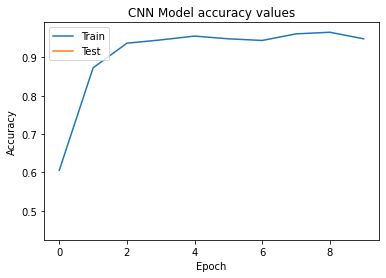

In [185]:
# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [152]:
from keras import models  
model = models.load_model("/content/drive/MyDrive/Dataset/mit-bih-arrhythmia-database_cwt/cwt_model_700.h5")

In [126]:
train_set.class_indices

{'Abnormal': 0, 'Normal': 1}

1/1 [==============================] - 0s 19ms/step
Confusion matrix, without normalization
[[124 133]
 [ 16   7]]


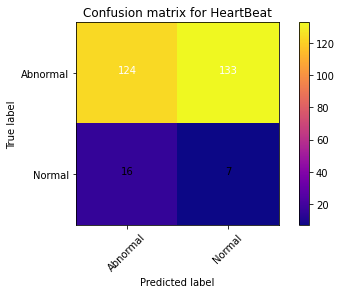

In [198]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input

y_actual = []
y_test = []

for i in os.listdir("/content/CWT_700_140_50/test/Abnormal"):
  img = load_img("/content/CWT_700_140_50/test/Abnormal/"+i,target_size=(224,224))
  img = img_to_array(img)
  img = np.expand_dims(img,axis=0)
  img = preprocess_input(img)
  p = (model.predict(img) > 0.5).astype("int32")
  y_test.append(p[0,0])
  y_actual.append(0)

for i in os.listdir("/content/CWT_700_140_50/test/Normal"):
  img = load_img("/content/CWT_700_140_50/test/Normal/"+i,target_size=(224,224))
  img = img_to_array(img)
  img = np.expand_dims(img,axis=0)
  img = preprocess_input(img)
  p = (model.predict(img) > 0.5).astype("int32")
  y_test.append(p[0,0])
  y_actual.append(1)

y_actual = np.array(y_actual)
y_test = np.array(y_test)

cm = confusion_matrix(y_test,y_actual)

class_names = ["Abnormal","Normal"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix for HeartBeat',cmap="plasma")


1/1 [==============================] - 0s 22ms/step
This Scalogram Image is of bulbul
Prediction Of Our Model :  Himalayan Bulbul


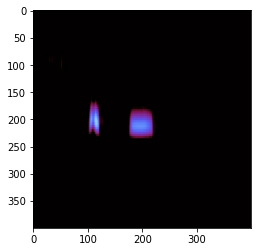

In [175]:
import numpy as np
# from google.colab.patches import cv2_imshow
import cv2
#from keras.preprocessing import image
import keras.utils as image


test_image = '/content/drive/MyDrive/BirdDatabase/Dataset/validate/Cuckoo/Cuckoo1-XC37447 - Common Cuckoo - Cuculus canorus-000.jpg'
xtest_image = image.load_img(test_image, target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
#results = model.predict(xtest_image)
results = (model.predict(xtest_image) > 0.5).astype("int32")
# training_set.class_indices
imggg = cv2.imread(test_image)
print("This Scalogram Image is of bulbul")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Cuckoo'
else:
    prediction = 'Himalayan Bulbul'
print("Prediction Of Our Model : ",prediction)

CWT

In [21]:
import numpy as np
import wfdb
import matplotlib.pyplot as plt
import cv2
import glob

Normal = []
Abnormal = []
def segmentation(records):
    for e in records:
        signals, fields = wfdb.rdsamp(e, channels=[0]) 

        ann = wfdb.rdann(e, 'atr')
        normal_beat = ['N','.']
        invalid_beat = [ "[", "!", "]", "x", "(", ")", "p", "t", 
                          "u", "`", "'", "^", "|", "~", "+", "s", 
                           "T", "*", "D", "=", '"', "@"]

        abnormal_beats = ["L", "R", "B", "A", "a", "J", "S", "V", 
                         "r", "F", "e", "j", "n", "E", "/", "f", "Q", "?"]

        ids1 = np.in1d(ann.symbol, normal_beat)
        ids2 = np.in1d(ann.symbol, abnormal_beats)
        imp_beats1 = ann.sample[ids1]
        imp_beats2 = ann.sample[ids2]
        beats = (ann.sample)
        a = segregate(signals, beats, imp_beats1)
        b = segregate(signals, beats, imp_beats2)
        print("Normal", len(a))
        print("Abnormal", len(b))

    return a,b
        


def segregate(signals, beats, imp_beats):
  segregate_beat = []
  for i in imp_beats:
            beats = list(beats)
            j = beats.index(i)
            if(j!=0 and j!=(len(beats)-1)):
                x = beats[j-1]
                y = beats[j+1]
                diff1 = abs(x - beats[j])//2
                diff2 = abs(y - beats[j])//2
                segregate_beat.append(signals[beats[j] - diff1: beats[j] + diff2, 0])

  return segregate_beat


patients = ['100','101','102','103','104','105','106','107',
           '108','109','111','112','113','114','115','116',
           '117','118','119','121','122','123','124','200',
           '201','202','203','205','207','208','209','210',
           '212','213','214','215','217','219','220','221',
           '222','223','228','230','231','232','233','234']

In [52]:
my_array = np.array(['/content/drive/MyDrive/Dataset/mit-bih-arrhythmia-database-1.0.0/104'])
Normal , Abnormal= segmentation(my_array)

Normal 163
Abnormal 2065


<ipython-input-53-ba5245a23d2c>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(4,2))


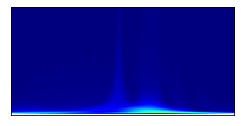

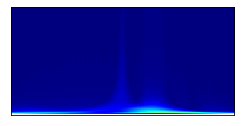

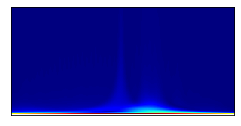

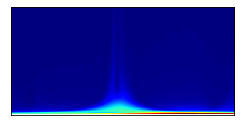

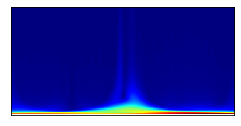

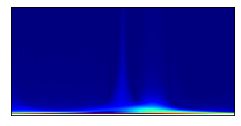

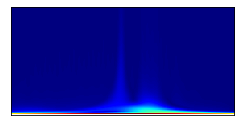

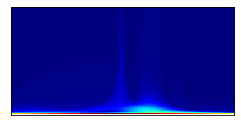

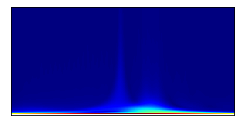

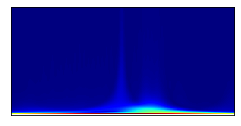

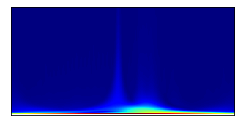

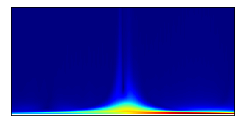

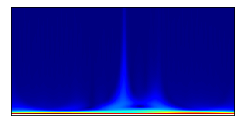

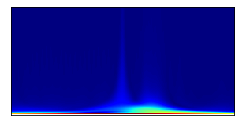

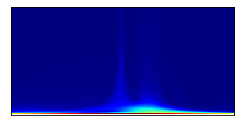

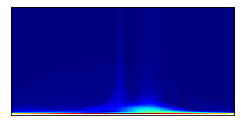

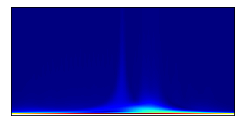

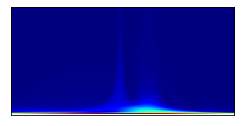

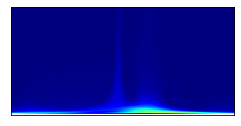

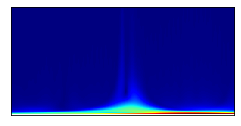

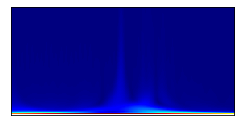

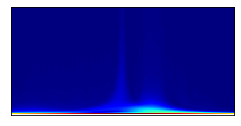

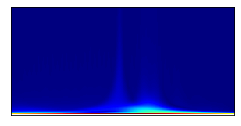

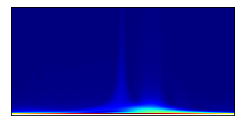

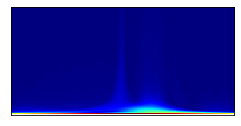

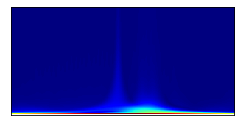

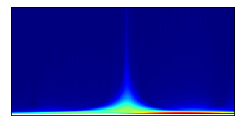

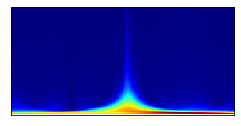

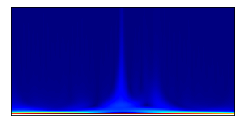

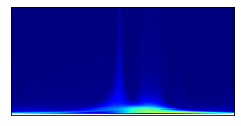

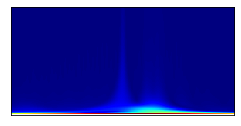

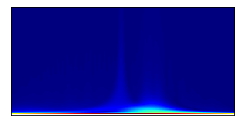

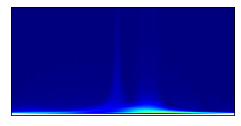

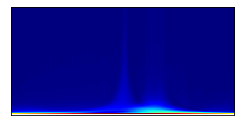

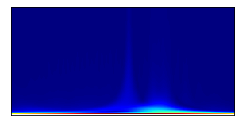

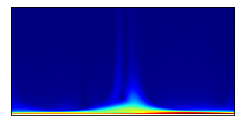

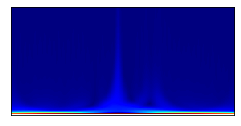

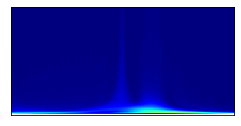

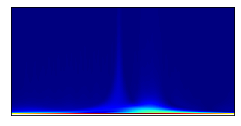

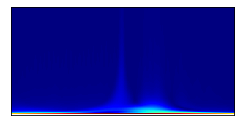

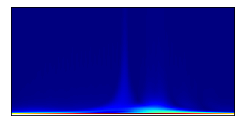

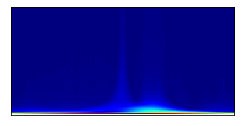

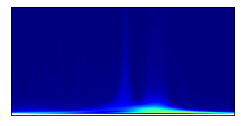

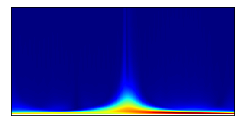

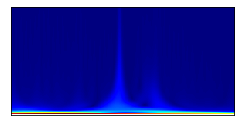

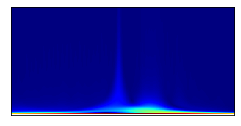

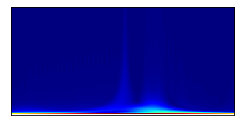

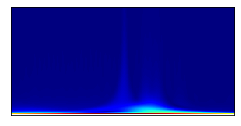

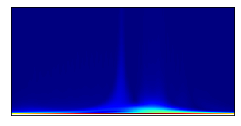

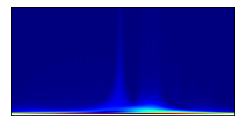

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import spkit as sp

sound_mono1=[]
index1 = 0
for i in range(1354,1404):
  index1 = index1 + 1
  sound_mono1=Abnormal[i]
  t = np.arange(len(sound_mono1))/360

  f0 = np.linspace(0,100,100)
  XW,S = sp.cwt.ScalogramCWT(sound_mono1,t,fs=360,wType='Gauss',PlotPSD=False,f0=f0)

  fig = plt.figure(figsize=(4,2))
  plt.imshow(np.abs(XW),aspect='auto',origin='lower',cmap='jet',interpolation='None',extent =[0, 1000, 0, 100])
  fig.gca().set_yticks([])
  fig.gca().set_xticks([])
  # print(i)
  # plt.show()
  fig.savefig('/content/drive/MyDrive/Dataset/mit-bih-arrhythmia-database_cwt/validate/Abnormal/'
        +str('104')+'_'+str(index1)+'.png')

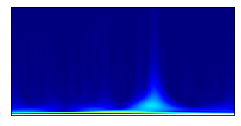

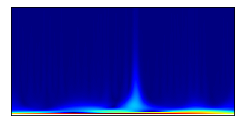

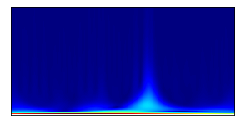

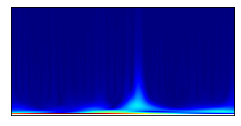

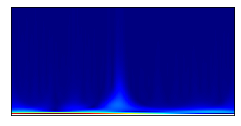

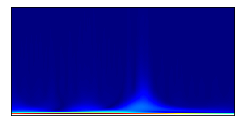

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import spkit as sp

sound_mono1=[]
index1 = 0
for i in range(1681,1687):
  index1 = index1 + 1
  sound_mono1=Normal[i]
  t = np.arange(len(sound_mono1))/360

  f0 = np.linspace(0,100,100)
  XW,S = sp.cwt.ScalogramCWT(sound_mono1,t,fs=360,wType='Gauss',PlotPSD=False,f0=f0)

  fig = plt.figure(figsize=(4,2))
  plt.imshow(np.abs(XW),aspect='auto',origin='lower',cmap='jet',interpolation='None',extent =[0, 1000, 0, 100])
  fig.gca().set_yticks([])
  fig.gca().set_xticks([])
  # plt.show()
  # print(index1)
  fig.savefig('/content/drive/MyDrive/Dataset/mit-bih-arrhythmia-database_cwt/validate/Normal/'
        +str('228')+'_'+str(index1)+'.png')